In [ ]:
!git clone https://github.com/ultralytics/yolov5.git  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16941, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 16941 (delta 70), reused 95 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16941/16941), 15.69 MiB | 12.42 MiB/s, done.
Resolving deltas: 100% (11608/11608), done.
/content/yolov5


In [ ]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
# from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.0/872.0 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00
Setup complete. Using torch 2.4.0+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [ ]:
%cd /content
!pip install gdown
!gdown https://drive.google.com/uc?id=1MPmAMUPhgoRXrMqSdYETRmAKKxLmoEr_ -O SignData.zip
!unzip SignData.zip
!rm SignData.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/images/-597DE6B4-F29B-4655-A97B-DBFEE2C995F8-png_jpg.rf.af1b9afcbd66e3ca9105eba142af4bc6.jpg  
 extracting: train/images/-597DE6B4-F29B-4655-A97B-DBFEE2C995F8-png_jpg.rf.ffbd7cb19baf4c7ab1c7be649f97ff65.jpg  
 extracting: train/images/-59D02DDC-DB49-41DA-8B1F-33712FDE8CEE-png_jpg.rf.367cb7a9ca5051a33b2188c2da384882.jpg  
 extracting: train/images/-59D02DDC-DB49-41DA-8B1F-33712FDE8CEE-png_jpg.rf.7cc6883ef69da709b68dc90df2a09005.jpg  
 extracting: train/images/-59D02DDC-DB49-41DA-8B1F-33712FDE8CEE-png_jpg.rf.c9e19151f722db5996d72c66f626990f.jpg  
 extracting: train/images/-59D02DDC-DB49-41DA-8B1F-33712FDE8CEE-png_jpg.rf.d2c9f2574b35ff5e2cbbcbcbac6dec58.jpg  
 extracting: train/images/-59D02DDC-DB49-41DA-8B1F-33712FDE8CEE-png_jpg.rf.d41bf9b29f9377f8cf97ead3a84fbda3.jpg  
 extracting: train/images/-59D02DDC-DB49-41DA-8B1F-33712FDE8CEE-png_jpg.rf.d746e63e65f5172dff8966821de0e469.jpg  
 extracting: train/images/-5A06964D-6

In [ ]:
%cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['2', '3', '4']

roboflow:
  workspace: end-to-end-project
  project: objectmaybe
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/end-to-end-project/objectmaybe/dataset/2

In [ ]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
num_classes

'3'

In [ ]:
%cat /content/yolov5/models/yolov5x.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 1.33 # model depth multiple
width_multiple: 1.25 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4],

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5x.yaml

# parameters
nc: {num_classes}
depth_multiple: 1.33 # model depth multiple
width_multiple: 1.25 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]

In [ ]:
%%time
%cd /content/yolov5/
!python train.py --img 672 --batch 16 --epochs 40 --data '../data.yaml' --cfg './models/custom_yolov5x.yaml' --weights 'yolov5x.pt' --name yolov5x_results --cache --patience 10 --hyp hyp.customx.yaml #--workers 1

Streaming output truncated to the last 5000 lines.
      25/39      14.3G    0.03317   0.001656  0.0009049         42        672:  55% 94/170 [01:58<01:37,  1.28s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      25/39      14.3G    0.03328   0.001661  0.0009039         53        672:  56% 95/170 [01:59<01:34,  1.26s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      25/39      14.3G    0.03333    0.00166  0.0009036         43        672:  56% 96/170 [02:01<01:32,  1.25s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      25/39      14.3G    0.03328 

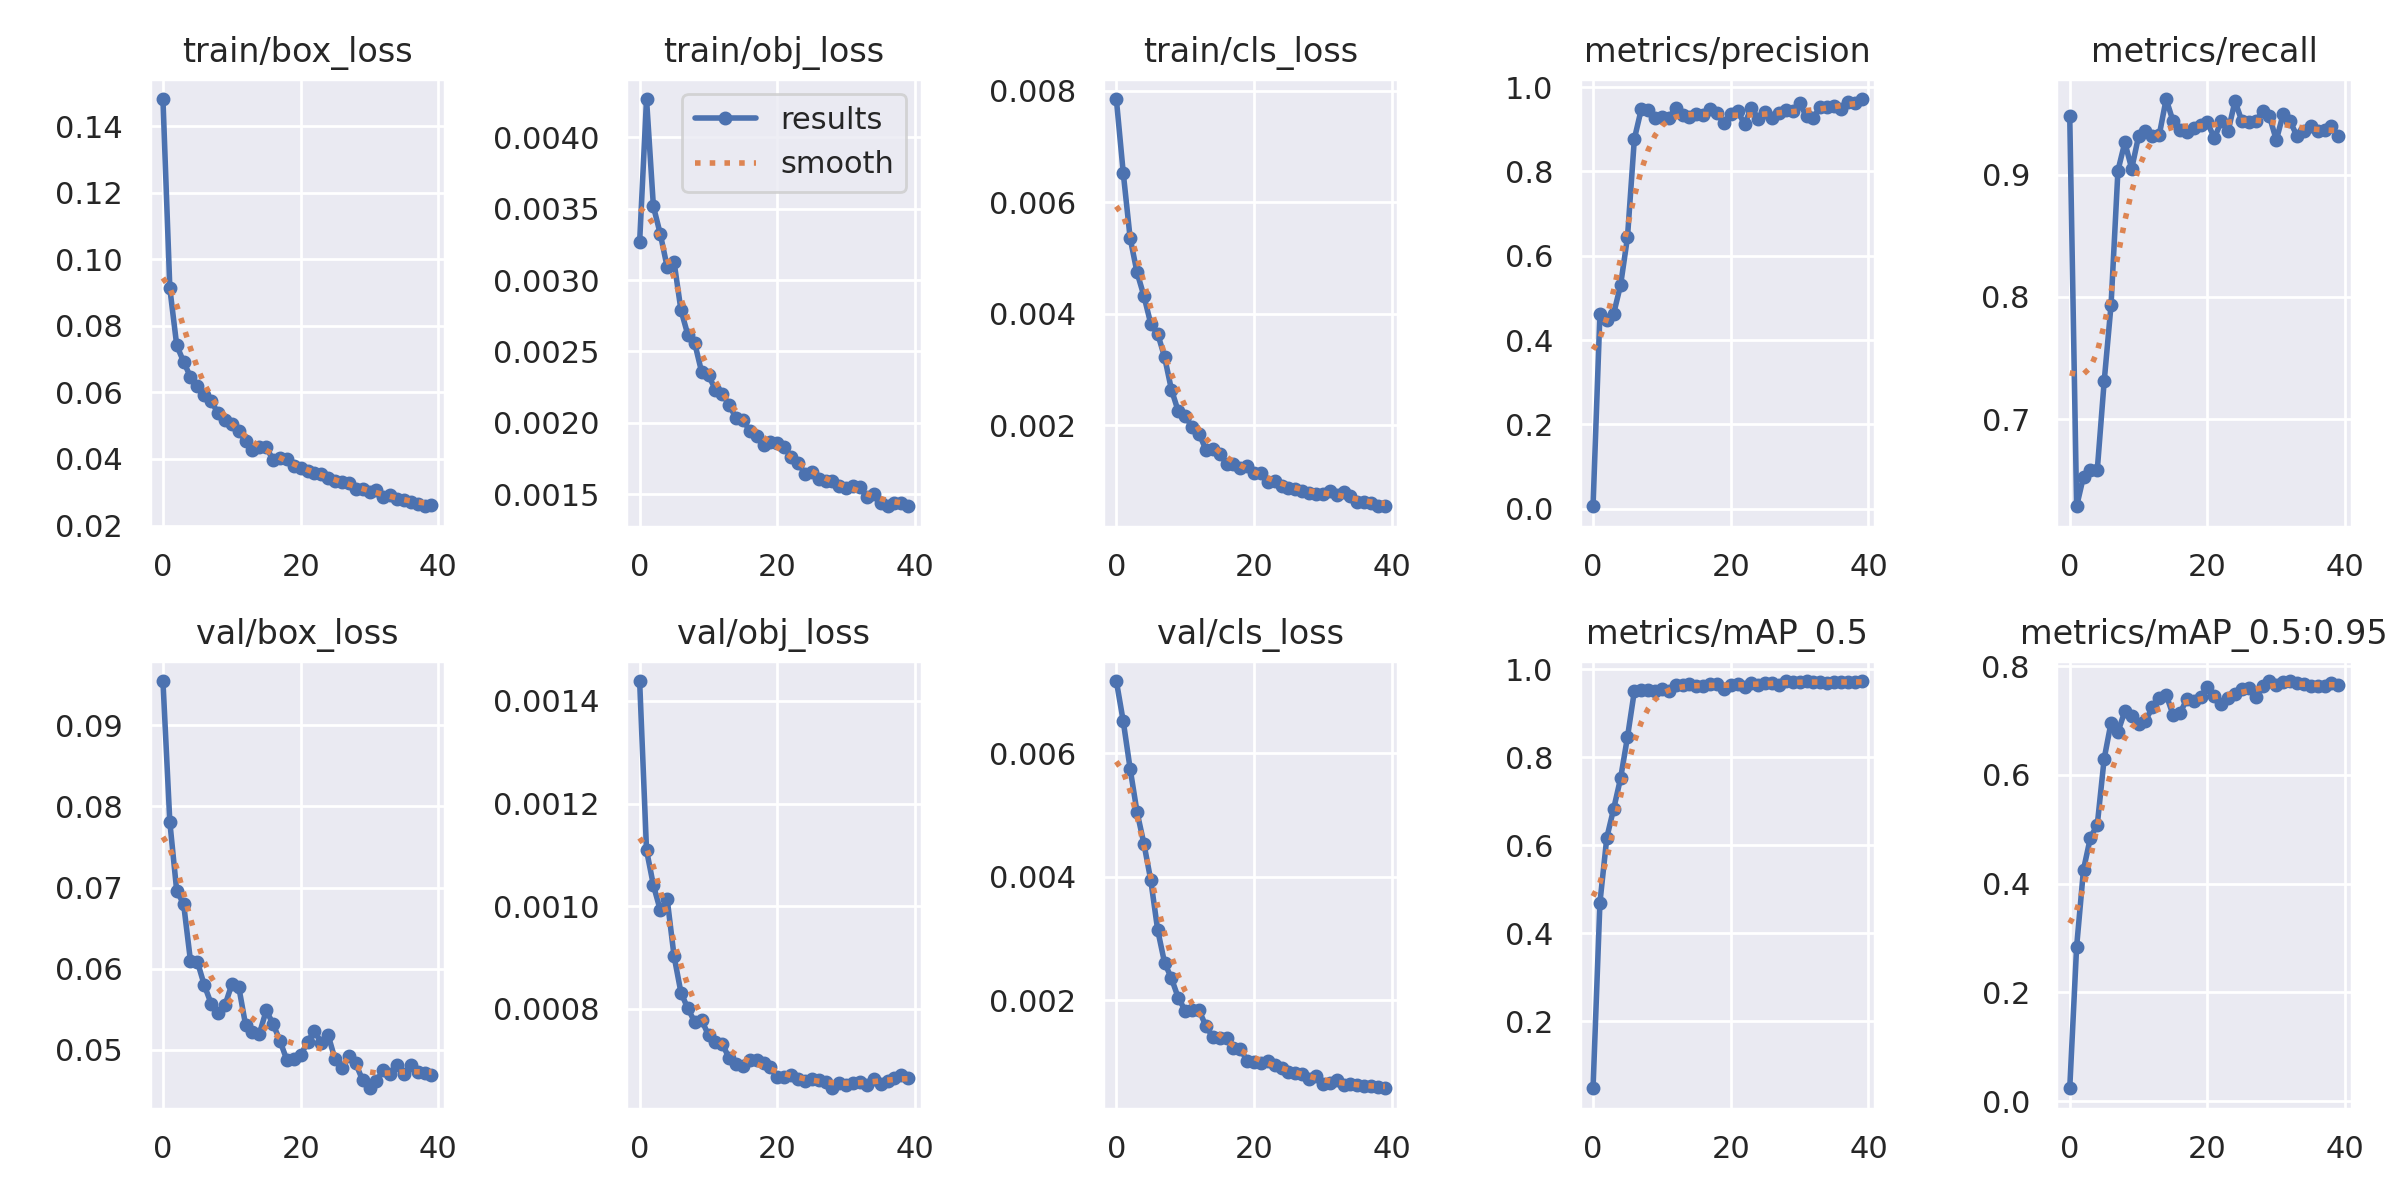

In [ ]:

# we can also output some older school graphs if the tensor board isn't working for whatever reason...
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5x_results/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


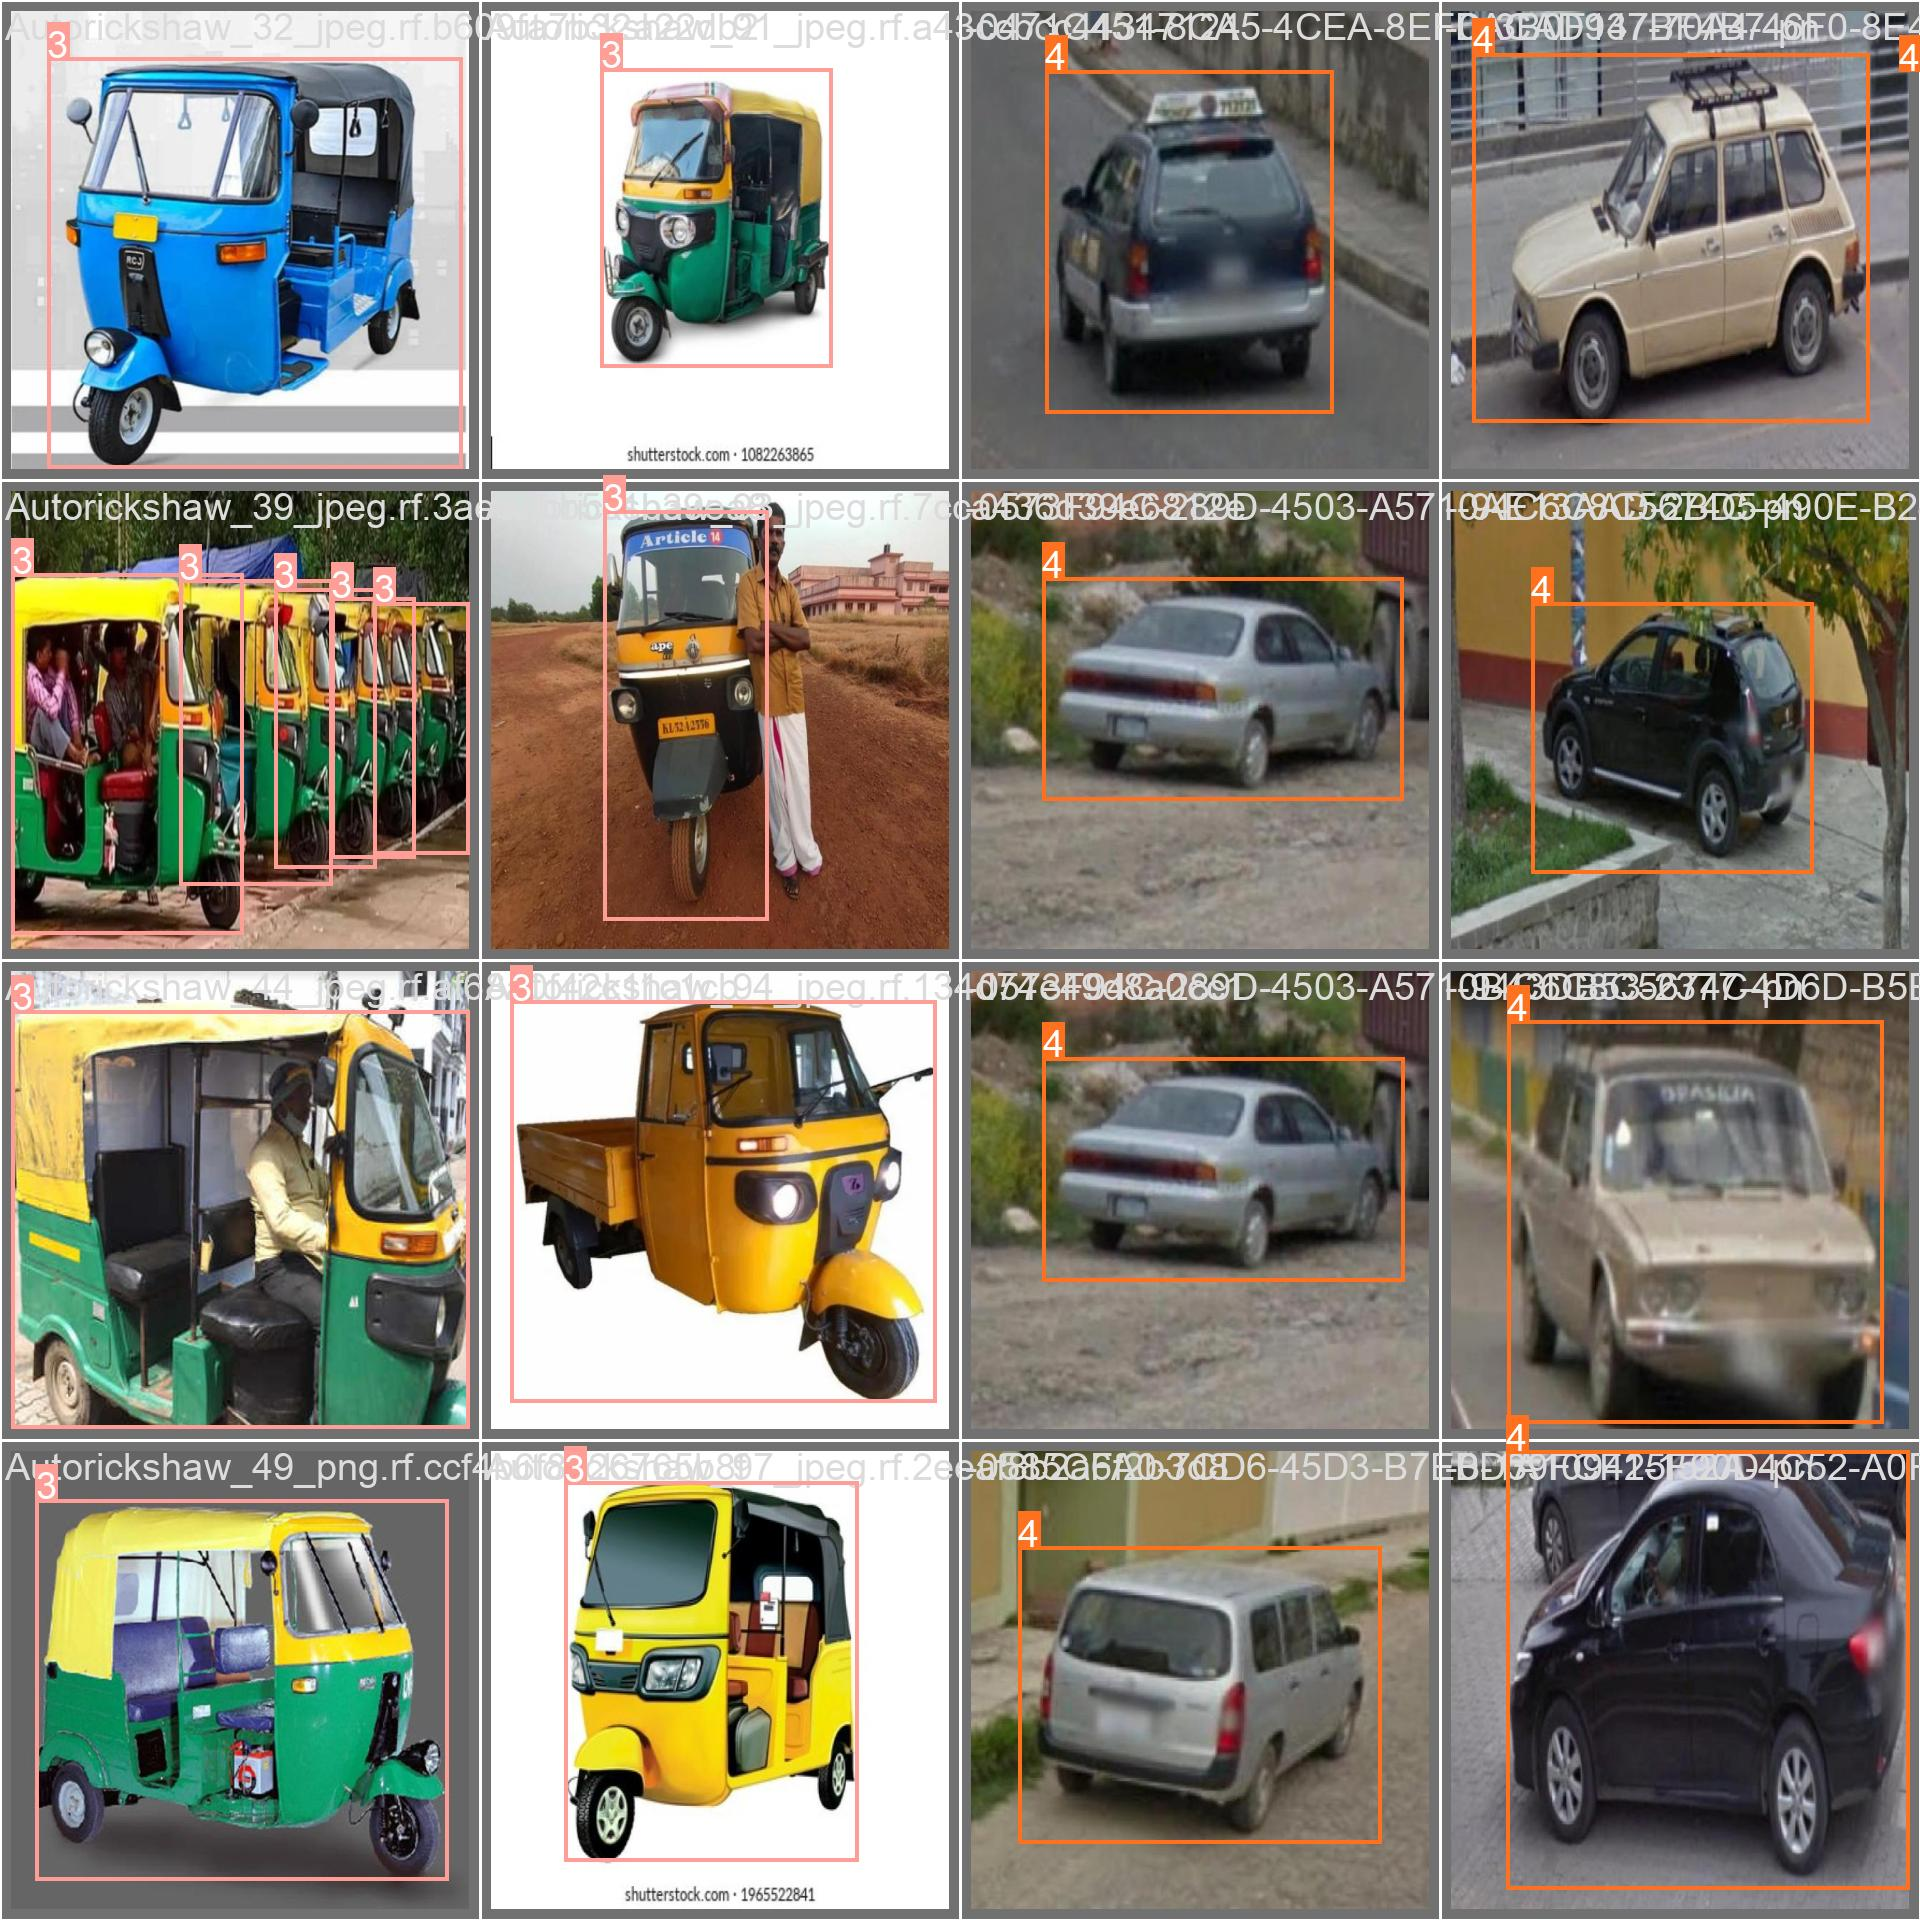

In [ ]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5x_results/val_batch0_labels.jpg', width=900)

In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5x_results/weights/best.pt --img 416 --conf 0.5 --source ../test/images

/content/yolov5
detect: weights=['runs/train/yolov5x_results/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5x summary: 322 layers, 86186872 parameters, 0 gradients, 203.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/134 /content/test/images/-0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.381f7a1d034c30b1d192af84b36a414e.jpg: 416x416 1 4, 45.7ms
image 2/134 /content/test/images/-0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.a06d31490654c3a85

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/yolov5/runs
# %cp /runs/detect/exp /content/gdrive/MyDrive/Research/SignLanguageDetection/model


/content/yolov5/runs


In [ ]:
import shutil
from google.colab import files

# Folder to zip
folder_to_zip = 'detect'
zip_file_name = 'your_folder_name.zip'

# Create a zip file
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', folder_to_zip)

# Download the zip file
files.download(zip_file_name)


'/content/yolov5/your_folder_name.zip'